# Access to PZ data train,test and pdf-qp output

- author : Sylvie Dagoret-Campagne
- affiliation : DESC, Rubin builder, IJCLab/IN2P3/CNRS
- creation date : 2025-08-14
- kernel@nersc : pz_miniconda3_rail_1_2 or desc-python-bleed

In [1]:
import GCRCatalogs

In [2]:
GCRCatalogs.get_available_catalog_names()
#GCRCatalogs.get_available_catalogs()

['buzzard',
 'buzzard_high-res',
 'cosmoDC2_v1.1.4_image',
 'cosmoDC2_v1.1.4_redmagic_v0.8.1_highdens',
 'cosmoDC2_v1.1.4_redmagic_v0.8.1_highlum',
 'cosmoDC2_v1.1.4_redmapper_v0.8.1',
 'cosmoDC2_v1.1.4_small',
 'cosmoDC2_v1.1.4_wazp_v1.0_flexzboost_v1',
 'cosmoDC2_v1.1.4_wazp_v1.0_truez',
 'dc2_object_run1.2i',
 'dc2_object_run1.2i_all_columns',
 'dc2_object_run1.2i_tract4850',
 'dc2_object_run1.2i_with_photoz',
 'dc2_object_run1.2p',
 'dc2_object_run1.2p_all_columns',
 'dc2_object_run1.2p_tract4850',
 'dc2_object_run2.2i_dr2_wfd',
 'dc2_object_run2.2i_dr2_wfd_with_addons',
 'dc2_object_run2.2i_dr3a',
 'dc2_object_run2.2i_dr3a_with_metacal',
 'dc2_object_run2.2i_dr3a_with_photoz',
 'dc2_object_run2.2i_dr6',
 'dc2_object_run2.2i_dr6_v2_with_addons_v2',
 'dc2_object_run2.2i_dr6_with_addons',
 'dc2_redmagic_run2.2i_dr6_wfd_v0.8.1_highdens',
 'dc2_redmagic_run2.2i_dr6_wfd_v0.8.1_highlum',
 'dc2_redmapper_run2.2i_dr6_wfd_v0.8.1',
 'dc2_run2.2i_truth_galaxy_summary',
 'dc2_run2.2i_truth_mer

In [3]:
import os
import rail
import qp
import tables_io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from rail.core.data import TableHandle
from rail.core.stage import RailStage

In [4]:
DS = RailStage.data_store
DS.__class__.allow_overwrite = True

In [5]:
PZ_BASE_AREA = os.environ.get("PZ_BASE_AREA")
PZ_PROJECTS_AREA = os.environ.get("PZ_PROJECTS_AREA")
PZ_DATA_AREA = os.environ.get("PZ_DATA_AREA")
print("\n".join([PZ_BASE_AREA,PZ_PROJECTS_AREA,PZ_DATA_AREA]))
INPUTSDIR = ["dp1_v29.0.0","dp1_v29.0.0_gold","dustmaps","lephare","on_sky","sandbox_data","test","train"]
FLAVORS = ["gold_baseline","gold_dp1_4band","gold_dp1_4band_paper","gold_dp1_6band","gold_dp1_6band_paper"]

/global/cfs/cdirs/lsst/groups/PZ/DP1
/global/cfs/cdirs/lsst/groups/PZ/DP1/projects
/global/cfs/cdirs/lsst/groups/PZ/DP1/data


In [6]:
rail_inputs_traintoppath = os.path.join(PZ_DATA_AREA,"train")
rail_inputs_testtoppath = os.path.join(PZ_DATA_AREA,"test")
rail_outputs_toppath = os.path.join(PZ_PROJECTS_AREA,"dp1_v4/data/gold_dp1_6band")

In [7]:
input_train_filename = "dp1_matched_v4_train.hdf5"
input_test_filename  = "dp1_matched_v4_test.hdf5"

In [8]:
input_train_fullfilename = os.path.join(rail_inputs_traintoppath,input_train_filename)
input_test_fullfilename = os.path.join(rail_inputs_testtoppath,input_test_filename)

In [9]:
from rail.utils.path_utils import find_rail_file
trainFile = find_rail_file(input_train_fullfilename)
testFile = find_rail_file(input_test_fullfilename)
train_data = DS.read_file("training_data", TableHandle, trainFile)
test_data = DS.read_file("test_data", TableHandle, testFile)

In [10]:
train_data().keys()

odict_keys(['confidence', 'coord_dec', 'coord_ra', 'ebv', 'euclid_h_unifMag', 'euclid_h_unifMagErr', 'euclid_j_unifMag', 'euclid_j_unifMagErr', 'euclid_vis_psfMag', 'euclid_vis_psfMagErr', 'euclid_y_unifMag', 'euclid_y_unifMagErr', 'ext_class', 'g_cModelMag', 'g_cModelMagErr', 'g_gaap1p0Mag', 'g_gaap1p0MagErr', 'g_gaap3p0Mag', 'g_gaap3p0MagErr', 'g_kronMag', 'g_kronMagErr', 'g_psfMag', 'g_psfMagErr', 'g_sersicMag', 'g_sersicMagErr', 'i_cModelMag', 'i_cModelMagErr', 'i_gaap1p0Mag', 'i_gaap1p0MagErr', 'i_gaap3p0Mag', 'i_gaap3p0MagErr', 'i_kronMag', 'i_kronMagErr', 'i_psfMag', 'i_psfMagErr', 'i_sersicMag', 'i_sersicMagErr', 'objectId', 'r_cModelMag', 'r_cModelMagErr', 'r_gaap1p0Mag', 'r_gaap1p0MagErr', 'r_gaap3p0Mag', 'r_gaap3p0MagErr', 'r_kronMag', 'r_kronMagErr', 'r_psfMag', 'r_psfMagErr', 'r_sersicMag', 'r_sersicMagErr', 'redshift', 'refExtendedness', 'snr_i_cModel', 'snr_i_gaap1p0', 'u_cModelMag', 'u_cModelMagErr', 'u_gaap1p0Mag', 'u_gaap1p0MagErr', 'u_gaap3p0Mag', 'u_gaap3p0MagErr', 

In [11]:
train_table = tables_io.convertObj(train_data(), tables_io.types.PD_DATAFRAME)
train_table.head()

,confidence,coord_dec,coord_ra,ebv,euclid_h_unifMag,euclid_h_unifMagErr,euclid_j_unifMag,euclid_j_unifMagErr,euclid_vis_psfMag,euclid_vis_psfMagErr,...,z_gaap1p0Mag,z_gaap1p0MagErr,z_gaap3p0Mag,z_gaap3p0MagErr,z_kronMag,z_kronMagErr,z_psfMag,z_psfMagErr,z_sersicMag,z_sersicMagErr
0,1.00,-27.824922,53.088664,0.007919,23.016863,0.131703,22.746885,0.103592,24.996698,0.036797,...,23.108530,0.030224,22.844844,0.059045,22.820101,0.050933,23.268513,0.028283,22.738372,0.027656
1,1.00,-27.931682,53.108887,0.008420,23.084949,0.117359,22.988714,0.120320,24.742360,0.040078,...,24.026827,0.062954,23.862155,0.134707,24.046341,0.072695,24.051751,0.052386,23.994012,0.052054
2,1.00,-27.605776,53.171847,0.009021,NaN,NaN,NaN,NaN,NaN,NaN,...,21.277247,0.010308,21.050411,0.020795,21.012470,0.018351,21.462851,0.010058,21.030302,0.009682
3,0.92,-28.191192,53.546995,0.008485,20.583101,0.016779,20.783633,0.019235,23.155347,0.011715,...,21.346464,0.007354,21.202269,0.016101,21.155527,0.011580,21.560787,0.007103,21.172607,0.006724
4,0.99,-27.855862,52.583389,0.008268,17.092996,0.003658,17.386755,0.004176,22.094573,0.005800,...,19.156844,0.002873,18.464341,0.003775,18.199718,0.003627,19.600979,0.003418,18.206413,0.002262


In [31]:
test_table = tables_io.convertObj(test_data(), tables_io.types.PD_DATAFRAME)

In [32]:
test_table

,confidence,coord_dec,coord_ra,ebv,euclid_h_unifMag,euclid_h_unifMagErr,euclid_j_unifMag,euclid_j_unifMagErr,euclid_vis_psfMag,euclid_vis_psfMagErr,...,z_gaap1p0Mag,z_gaap1p0MagErr,z_gaap3p0Mag,z_gaap3p0MagErr,z_kronMag,z_kronMagErr,z_psfMag,z_psfMagErr,z_sersicMag,z_sersicMagErr
0,1.00,-27.760434,53.058099,0.009129,21.847612,0.049735,22.038692,0.060290,24.205842,0.027605,...,22.712450,0.023214,22.718473,0.058378,22.677559,0.033641,22.783941,0.019921,22.627517,0.019812
1,1.00,-27.867529,53.106185,0.007575,NaN,NaN,26.335986,328.816077,25.528822,0.071971,...,24.312382,0.084188,23.955036,0.150857,24.288043,0.154199,24.388557,0.072831,24.225350,0.071923
2,0.92,-28.413099,53.076021,0.007745,NaN,NaN,NaN,NaN,NaN,NaN,...,20.348289,0.002728,20.269589,0.006260,20.245831,0.004092,20.456321,0.002469,20.257848,0.002418
3,0.92,-28.494259,53.439149,0.006516,17.551755,0.004977,17.746669,0.005038,22.546042,0.008075,...,19.446292,0.002804,18.578132,0.003152,18.286177,0.004193,20.022158,0.003906,18.271769,0.002500
4,1.00,-27.700994,53.094307,0.009434,NaN,NaN,NaN,NaN,NaN,NaN,...,24.255070,0.106345,24.114328,0.234071,24.313691,0.167843,24.285720,0.088138,24.095016,0.089073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,1.00,-27.703886,53.110412,0.009382,NaN,NaN,NaN,NaN,NaN,NaN,...,22.757728,0.026657,22.523726,0.053768,22.430795,0.046142,23.060743,0.028548,22.282060,0.026278
2901,0.92,-28.206383,52.611826,0.007289,19.570815,0.011961,19.960365,0.023180,23.662807,0.020238,...,21.181214,0.009763,20.964976,0.019886,20.887733,0.015476,21.411396,0.010182,20.834230,0.009323
2902,0.92,-27.853531,53.339620,0.007084,19.511784,0.010974,19.771610,0.013454,23.578865,0.013267,...,21.073548,0.004914,20.792273,0.009478,20.685600,0.007777,21.424669,0.005510,20.632991,0.004848
2903,0.95,-27.693337,53.007529,0.009741,NaN,NaN,NaN,NaN,NaN,NaN,...,21.038488,0.006769,20.703712,0.012503,20.662464,0.010575,21.424520,0.007740,20.682111,0.006672


In [13]:
print(test_table.columns)

Index(['confidence', 'coord_dec', 'coord_ra', 'ebv', 'euclid_h_unifMag',
       'euclid_h_unifMagErr', 'euclid_j_unifMag', 'euclid_j_unifMagErr',
       'euclid_vis_psfMag', 'euclid_vis_psfMagErr', 'euclid_y_unifMag',
       'euclid_y_unifMagErr', 'ext_class', 'g_cModelMag', 'g_cModelMagErr',
       'g_gaap1p0Mag', 'g_gaap1p0MagErr', 'g_gaap3p0Mag', 'g_gaap3p0MagErr',
       'g_kronMag', 'g_kronMagErr', 'g_psfMag', 'g_psfMagErr', 'g_sersicMag',
       'g_sersicMagErr', 'i_cModelMag', 'i_cModelMagErr', 'i_gaap1p0Mag',
       'i_gaap1p0MagErr', 'i_gaap3p0Mag', 'i_gaap3p0MagErr', 'i_kronMag',
       'i_kronMagErr', 'i_psfMag', 'i_psfMagErr', 'i_sersicMag',
       'i_sersicMagErr', 'objectId', 'r_cModelMag', 'r_cModelMagErr',
       'r_gaap1p0Mag', 'r_gaap1p0MagErr', 'r_gaap3p0Mag', 'r_gaap3p0MagErr',
       'r_kronMag', 'r_kronMagErr', 'r_psfMag', 'r_psfMagErr', 'r_sersicMag',
       'r_sersicMagErr', 'redshift', 'refExtendedness', 'snr_i_cModel',
       'snr_i_gaap1p0', 'u_cModelMag', 'u

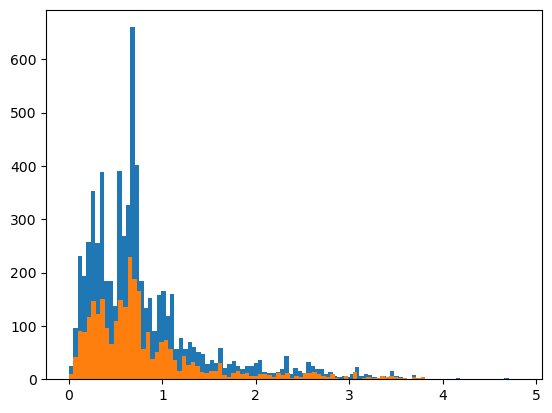

In [14]:
plt.hist(train_data()['redshift'],bins=100);
plt.hist(test_data()['redshift'],bins=100);

In [17]:
#newens = qp.read("KNNPZ_estimates.hdf5")

In [23]:
all_output_files = []
with os.scandir(rail_outputs_toppath) as it:
    for entry in it:
        if entry.name.startswith('output') and entry.is_file():
            all_output_files.append(entry.name)

In [24]:
all_output_files

['output_estimate_cmnn.hdf5',
 'output_evaluate_tpz.hdf5',
 'output_estimate_tpz.hdf5',
 'output_estimate_dnf.hdf5',
 'output_evaluate_cmnn.hdf5',
 'output_evaluate_lephare.hdf5',
 'output_evaluate_knn.hdf5',
 'output_estimate_bpz.hdf5',
 'output_evaluate_gpz.hdf5',
 'output_estimate_fzboost.hdf5',
 'output_estimate_lephare.hdf5',
 'output_evaluate_dnf.hdf5',
 'output_estimate_gpz.hdf5',
 'output_evaluate_fzboost.hdf5',
 'output_evaluate_bpz.hdf5',
 'output_estimate_knn.hdf5']

In [26]:
the_selected_output_file = "output_estimate_bpz.hdf5"

In [28]:
the_selected_output_fullfile = os.path.join(rail_outputs_toppath,the_selected_output_file)

In [29]:
qpens = qp.read(the_selected_output_fullfile)

In [30]:
qpens

Ensemble(the_class=interp,shape=(2905, 301))

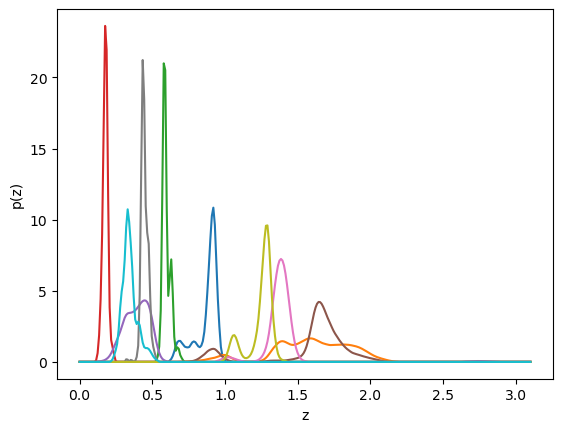

In [37]:
zgrid = np.linspace(0, 3.1, 301)

for idx in range(10):
    _ = plt.plot(zgrid, np.squeeze(qpens[idx].pdf(zgrid)))
_ = plt.xlabel('z')
_ = plt.ylabel('p(z)')